In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import splinelib as tsp

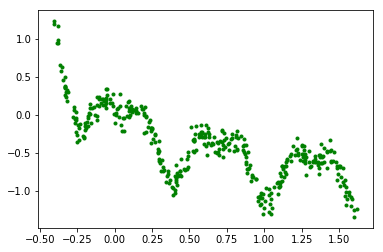

In [2]:
x = np.linspace(0,2,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [3]:
max_points = 10
lr=0.1
spline = tsp.Spline1D(max_points, x, y)

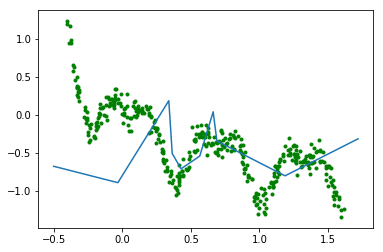

In [4]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y)

_______________________
Steps 0
Error 1.2212744597054113


_______________________
Steps 10
Error 0.5302078577837535


_______________________
Steps 20
Error 0.23528223600714987


_______________________
Steps 30
Error 0.13568155815916108


_______________________
Steps 40
Error 0.09369500208473498


_______________________
Steps 50
Error 0.07537323608100928


_______________________
Steps 60
Error 0.0655322717739055


_______________________
Steps 70
Error 0.05994465193259501


_______________________
Steps 80
Error 0.05651211209307385


_______________________
Steps 90
Error 0.05418903083866239


_______________________
Steps 100
Error 0.05250185369809407


_______________________
Steps 110
Error 0.04928622844928971


_______________________
Steps 120
Error 0.04646437433514027


_______________________
Steps 130
Error 0.04422745401576941


_______________________
Steps 140
Error 0.042429611987509185


_______________________
Steps 150
Error 0.04098926170947612


_____________________



_______________________
Steps 1330
Error 0.012903604254387933


_______________________
Steps 1340
Error 0.012903602747700648


_______________________
Steps 1350
Error 0.012903601418026161


_______________________
Steps 1360
Error 0.012903600244453663


_______________________
Steps 1370
Error 0.01290359920856245


_______________________
Steps 1380
Error 0.012903598294121944


_______________________
Steps 1390
Error 0.01290359748682848


_______________________
Steps 1400
Error 0.01290359677407417


_______________________
Steps 1410
Error 0.012903596144743958


_______________________
Steps 1420
Error 0.012903595589037238


_______________________
Steps 1430
Error 0.012903595098311082


_______________________
Steps 1440
Error 0.012903594664942397


_______________________
Steps 1450
Error 0.01290359428220669


_______________________
Steps 1460
Error 0.012903593944171385


_______________________
Steps 1470
Error 0.012903593645601947


_______________________
Steps 1480
Error 0

TclError: invalid command name "pyimage10"

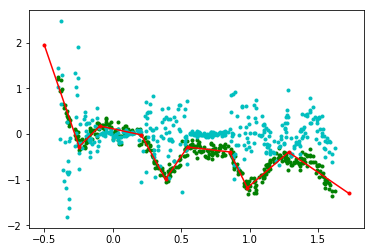

In [5]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):

    Y = spline.forward(x) + x
#     Y = spline.forward(x)
    
    dy = Y-y
#     dx = spline.backward(dy)
    dx = spline.backward(dy) + dy
    spline.update(lr)
    
    if step % 100 == 0:
        spline._remove_close_points_()
        spline._combine_linear_points_()
        spline._remove_no_input_points_()
        spline._add_new_point_()
        
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
#         plt.plot(spline.X, spline.Y, marker='.', color='r')
        plt.plot(spline.X, spline.X+spline.Y, marker='.', color='r')
        plt.scatter(x, dx, marker='.', color='c')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

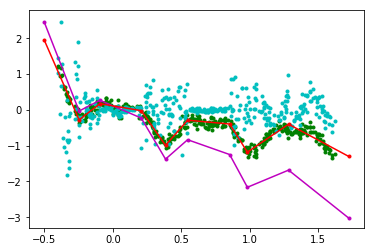

In [6]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='m')
plt.plot(spline.X, spline.X+spline.Y, marker='.', color='r')
plt.scatter(x, dx, marker='.', color='c')